# End-to-end MNIST

# Training

In [1]:
import utils

x_train_sample, y_train_sample = utils.sample_train_mnist()
x_test_sample, y_test_sample = utils.sample_test_mnist()

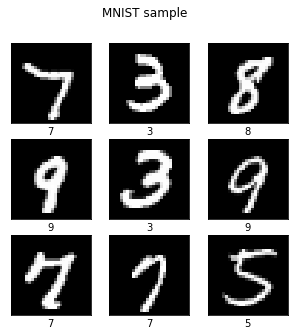

In [2]:
utils.show_numbers(x_train_sample, y_train_sample, title=f"MNIST sample")

In [3]:
import sys
import matplotlib.pyplot as plt
import os
sys.path.insert(0,'..')

import scanflow

from scanflow.setup import Setup, Executor, Workflow
from scanflow.special import Tracker, Checker, Improver, Planner
from scanflow.deploy import Deploy

# App folder
base_path = os.path.dirname(os.getcwd())
app_dir = os.path.join(base_path, "examples/demo_mnist/data-science/")


executors = [Executor(name='modeling-mnist', 
                      file='modeling.py',
                      parameters={'x_train_path': './mnist_sample/train_images.npy', 
                                  'y_train_path': './mnist_sample/train_labels.npy',
                                  'x_test_path': './mnist/test_images.npy',
                                  'y_test_path': './mnist/test_labels.npy'},
                      requirements='req_modeling.txt')           
            ]


workflow1 = Workflow(name='mnist', 
                     executors=executors,
                     # Online debugging: activate agents
                     tracker=Tracker(mode='online'),
                     checker=Checker(mode='online'))
    
setup = Setup(app_dir, workflows=[workflow1],
                             verbose=True)

setup

04-Apr-21 19:17:32 -  INFO - [Tracker] Port 8002 is set successfully.
04-Apr-21 19:17:32 -  INFO - [Checker] Port 8004 is set successfully.



Setup = (
    Workflows: ['mnist']
)

In [4]:
deployer = Deploy(setup, verbose=True)
docker  = deployer.get_backend()

In [5]:
docker.build_workflows()
docker.start_workflows()
docker.run_workflows()
# docker.stop_workflows()

04-Apr-21 19:17:33 -  INFO - [+] Compose file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-repository/docker-compose.yml] was created successfully.
04-Apr-21 19:17:33 -  INFO - [+] Main file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-repository/main.py] was created successfully.
04-Apr-21 19:17:33 -  INFO - [+] Compose file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-verbose/docker-compose.yml] was created successfully.
04-Apr-21 19:17:33 -  INFO - [+] Main file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-verbose/main.py] was created successfully.
04-Apr-21 19:17:33 -  INFO - [+] Compose file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-swarm/docker-compose.yml] was create

Elapsed time: 4.613558530807495


# Predictor (batch)

In [6]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import os
sys.path.insert(0,'..')

import scanflow

from scanflow.setup import Setup, Executor, Workflow
from scanflow.special import Tracker, Checker, Improver, Planner
from scanflow.deploy import Deploy

# App folder
base_path = os.path.dirname(os.getcwd())
app_dir = os.path.join(base_path, "examples/demo_mnist/data-science/")


executors = [Executor(name='predictor', 
                      file='predictor-batch.py',
                      parameters={'input_path': './mnist_sample/test_images.npy',
                                 'model_name':'mnist_cnn', 'model_version':13},
                      requirements='req_predictor.txt')           
            ]


workflow1 = Workflow(name='mnist', 
                     executors=executors,
                     tracker=Tracker(mode='online'),
                     checker=Checker(mode='online'),
                     improver=Improver(mode='online'),
                     planner=Planner(mode='online'))
    
setup1 = Setup(app_dir, workflows=[workflow1],
                             verbose=True)

setup1

04-Apr-21 19:17:48 -  INFO - [Tracker] Port 8002 is in use by Tracker.
04-Apr-21 19:17:48 -  INFO - [Checker] Port 8004 is set successfully.
04-Apr-21 19:17:48 -  INFO - [Improver] Port 8006 is set successfully.
04-Apr-21 19:17:48 -  INFO - [Planner] Port 8007 is set successfully.



Setup = (
    Workflows: ['mnist']
)

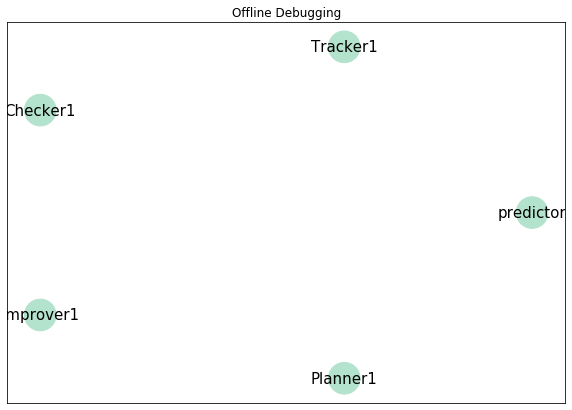

In [7]:
setup1.draw_graph()

In [8]:
deployer1 = Deploy(setup1, verbose=True)
docker1 = deployer1.get_backend()

In [9]:

docker1.build_workflows()
docker1.start_workflows()
docker1.run_workflows()

04-Apr-21 19:18:22 -  INFO - [+] Compose file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-repository/docker-compose.yml] was created successfully.
04-Apr-21 19:18:22 -  INFO - [+] Main file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-repository/main.py] was created successfully.
04-Apr-21 19:18:22 -  INFO - [+] Compose file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-verbose/docker-compose.yml] was created successfully.
04-Apr-21 19:18:22 -  INFO - [+] Main file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-verbose/main.py] was created successfully.
04-Apr-21 19:18:22 -  INFO - [+] Compose file [/gpfs/bsc_home/xpliu/pv/jupyterhubpeini/scanflow/examples/demo_mnist/data-science/ad-stuff/ad-meta/compose-swarm/docker-compose.yml] was create

Elapsed time: 1.9268102645874023


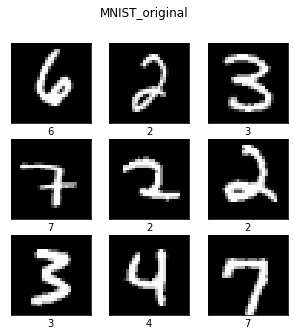

In [44]:
utils.show_numbers(x_test_sample, y_test_sample, title=f"MNIST_original")

In [45]:
docker1.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]04-Apr-21 11:29:01 -  INFO - [++] Running workflow: [mnist].
04-Apr-21 11:29:01 -  INFO - [+] Running env: [mnist:predictor].
04-Apr-21 11:29:02 -  INFO - [+] Running (predictor-batch.py). 
04-Apr-21 11:29:02 -  INFO - [+] Output:     predictions
0            6
1            2
2            3
3            4
4            9
5            2
6            3
7            4
8            9
9            6
 
04-Apr-21 11:29:02 -  INFO - [+] Environment (predictor) finished successfully. 
04-Apr-21 11:29:02 -  INFO - [+] Workflow: [mnist] was run successfully.
100%|██████████| 1/1 [00:01<00:00,  1.54s/it]

Elapsed time: 1.5378730297088623


In [10]:
!curl -X 'GET' \
  'http://localhost:8003/send/checker/anomaly' \
  -H 'accept: application/json'

{"feedback":{"input_run_id":"7df84bf4c0524ead94b5f1e4b87b68e4","input_path":"input.npy","n_anomalies":88,"percentage_anomalies":0.088},"conclusions":"Alert!, 0.088% anomalies"}

# Input anomalies

In [11]:
x_test_sample_c, y_test_sample_c = utils.sample_test_mnist_c(corruption='stripe')
utils.show_numbers(x_test_sample_c, y_test_sample_c, title=f"MNIST stripe")

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_c/stripe/train_images.npy'

In [48]:
docker.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]04-Apr-21 11:29:05 -  INFO - [++] Running workflow: [mnist].
04-Apr-21 11:29:05 -  INFO - [+] Running env: [mnist:modeling-mnist].
04-Apr-21 11:29:09 -  INFO - [+] Running (modeling.py). 
100%|██████████| 10/10 [00:01<00:00,  9.49it/s]
Registered model 'mnist_cnn' already exists. Creating a new version of this model...
2021/04/04 09:29:08 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: mnist_cnn, version 15
Created version '15' of model 'mnist_cnn'.
 
04-Apr-21 11:29:09 -  INFO - [+] Environment (modeling-mnist) finished successfully. 
04-Apr-21 11:29:09 -  INFO - [+] Workflow: [mnist] was run successfully.
100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

Elapsed time: 4.065953731536865


In [52]:
!curl -X 'GET' \
  'http://localhost:8003/send/checker/anomaly' \
  -H 'accept: application/json'

curl: (7) Failed to connect to localhost port 8003: Connection refused


In [50]:
docker.stop_workflows()

04-Apr-21 11:29:09 -  INFO - [+] Environment: [modeling-mnist] was stopped successfully.
04-Apr-21 11:29:19 -  INFO - [+] Tracker: [tracker-mnist] was stopped successfully.
04-Apr-21 11:29:30 -  INFO - [+] Tracker agent: [tracker-agent-mnist] was stopped successfully.
04-Apr-21 11:29:30 -  INFO - [+] Checker: [checker-mnist] was stopped successfully.
04-Apr-21 11:29:40 -  INFO - [+] Checker agent: [checker-agent-mnist] was stopped successfully.
04-Apr-21 11:29:40 -  INFO - [+] Stopped containers were pruned.
04-Apr-21 11:29:40 -  INFO - [+] Network: [network_mnist] is not running in local.


# Tracker

In [3]:
import pandas as pd
from scanflow import track

tracker = track.Tracker(app_dir)
last_artifacts = tracker.list_artifacts(workflow_name='mnist')
print(last_artifacts.keys())


21-Mar-21 18:11:15 -  INFO - [Tracker]  'run_id' is not provided. Loading the latest experiment.
21-Mar-21 18:11:15 -  INFO - [Tracker]  'experiment_name' is not provided. Loading the 'Default' experiment.


dict_keys(['input.npy', 'preds.csv'])


In [4]:
input_loaded = np.load(last_artifacts['input.npy'])
input_loaded.shape

(1000, 28, 28)

# TODO


- let human label the inputs using checker